In [ ]:
from cocoonclassifier_class import MODEL
import torch
# conduct command
# for modelname in ['resnet' , 'vgg16', 'googlenet']:
    # for batch_size in range(10, 110, 10):
# cocoon = MODEL('cait', 30, 8, 'feature_extraction')
# losses = ["BCE", "CE", "SM" ]
losses = ["CE" ]
optimizers = ["RMSprop", "AdamW", "SGD" ]
# optimizers = ["SGD"]

accuracy_list, recall_list, precision_list, f1_score_list = [], [], [], []
for loss in losses:
    for optimizer in optimizers:
        print("-"*10, f"loss:{loss}, optimizer:{optimizer}")
        cocoon = MODEL('cait', 50, 16, 'finetune', loss, optimizer)
#         cocoon = MODEL('vgg16', 2, 8, 'finetune', loss, optimizer)
        cocoon.read_train_data("../data/delta_day_3__train_test_mix/train")
        cocoon.train()
        # cocoon.read_list('/content/drive/My Drive/Colab Notebooks/out_put_chart/bs_{}_1355&929_vgg16.data'.format(cocoon.batch_size))
        # cocoon.read_model('/content/drive/My Drive/Colab Notebooks/bs_10_lr_-4_930&1067_vgg16_finetune')
        cocoon.plot()
        cocoon.read_test_data("../data/delta_day_3__train_test_mix/val")
        accuracy, recall, precision, f1_score = cocoon.test()
        accuracy_list.append(accuracy)
        recall_list.append(recall)
        precision_list.append(precision)
        f1_score_list.append(f1_score)
#         torch.cuda.empty_cache()


In [7]:
from cocoonclassifier_class import MODEL
import matplotlib.pyplot as plt
# model_path = "./out_put_chart/finetune/cait/bs_16_cait_op_AdamW_ls_CE.data"
# cocoon = MODEL('cait', 30, 16, 'finetune', "CE", "AdamW")
# cocoon.read_model(model_path)
list_path = ["./out_put_chart/finetune/cait/bs_16_cait_op_AdamW_ls_CE.data", 
cocoon.read_list(list_path)
cocoon.plot()



<Figure size 1440x720 with 0 Axes>

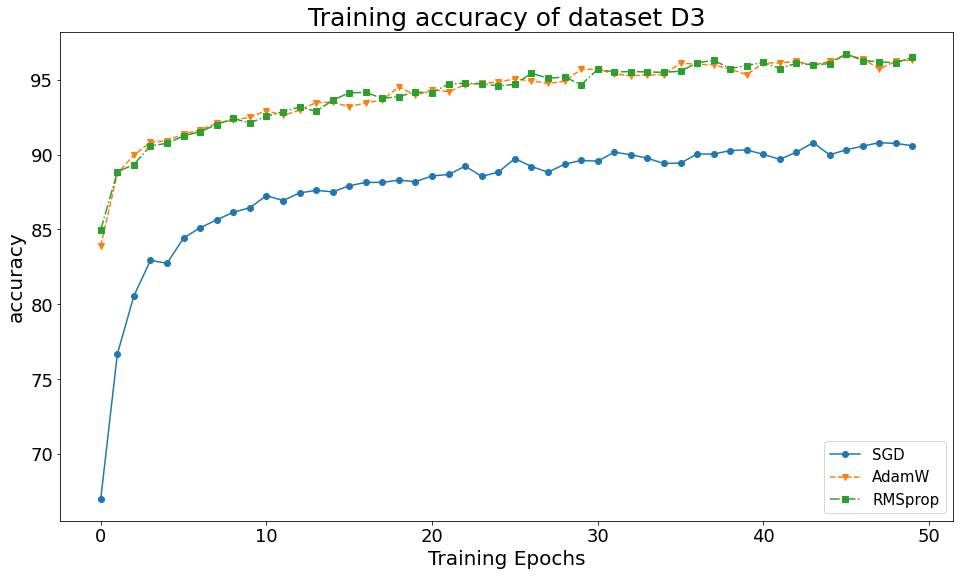

In [12]:
import pickle
import matplotlib.pyplot as plt
list_path = ["./out_put_chart/finetune/cait/bs_16_cait_op_SGD_ls_CE.data",
             "./out_put_chart/finetune/cait/bs_16_cait_op_AdamW_ls_CE.data",
             "./out_put_chart/finetune/cait/bs_16_cait_op_RMSprop_ls_CE.data"]
name = ["SGD", "AdamW", "RMSprop"]
style = ['-o', '--v', '-.s']
plt.figure(figsize=(16,9))
plt.title("Training accuracy of dataset D3", fontsize=25)
for i, path in enumerate(list_path):
    with open(path, 'rb') as filehandle:
        # read the data as binary data stream
        placesList = pickle.load(filehandle)
    train_loss, val_loss, train_acc, val_acc, batch_size\
         = placesList[0], placesList[1], placesList[2], placesList[3], placesList[4]
    plt.plot(range(len(train_acc)),train_acc, style[i], label=f"{name[i]}")
plt.xlabel("Training Epochs", fontsize=20)
plt.ylabel("accuracy", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc = 4, prop = {'size':15})
plt.savefig('Training_acc.jpg')
plt.show()

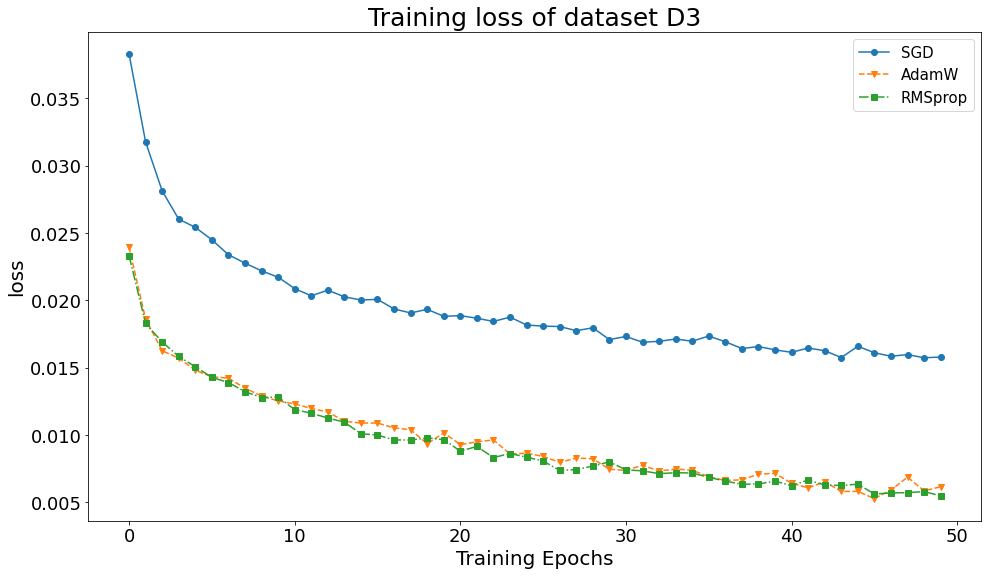

In [13]:
import pickle
import matplotlib.pyplot as plt
list_path = ["./out_put_chart/finetune/cait/bs_16_cait_op_SGD_ls_CE.data",
             "./out_put_chart/finetune/cait/bs_16_cait_op_AdamW_ls_CE.data",
             "./out_put_chart/finetune/cait/bs_16_cait_op_RMSprop_ls_CE.data"]
name = ["SGD", "AdamW", "RMSprop"]
style = ['-o', '--v', '-.s']
plt.figure(figsize=(16,9))
plt.title("Training loss of dataset D3", fontsize=25)
for i, path in enumerate(list_path):
    with open(path, 'rb') as filehandle:
        # read the data as binary data stream
        placesList = pickle.load(filehandle)
    train_loss, val_loss, train_acc, val_acc, batch_size\
         = placesList[0], placesList[1], placesList[2], placesList[3], placesList[4]
    plt.plot(range(len(train_acc)),train_loss, style[i], label=f"{name[i]}")
plt.xlabel("Training Epochs", fontsize=20)
plt.ylabel("loss", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc = 1, prop = {'size':15})
plt.savefig('Training_loss.jpg')
plt.show()


In [17]:
import torch
from torchsummary import summary
from torchvision import models
model = torch.hub.load("facebookresearch/deit", "cait_XXS24_224",pretrained=True)
# model = models.vgg16(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
model.linear = torch.nn.Sequential(torch.nn.Linear(1000, 500),
                                                torch.nn.ReLU(),
                                                torch.nn.Dropout(p=0.5),
                                                torch.nn.Linear(500, 2))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
# summary(model, (3,224,224))
print(model)

Using cache found in /home/jim/.cache/torch/hub/facebookresearch_deit_main


cait_models(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 192, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): ModuleList(
    (0): LayerScale_Block(
      (norm1): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
      (attn): Attention_talking_head(
        (qkv): Linear(in_features=192, out_features=576, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=192, out_features=192, bias=True)
        (proj_l): Linear(in_features=4, out_features=4, bias=True)
        (proj_w): Linear(in_features=4, out_features=4, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=192, out_features=768, bias=True)
        (act): GELU(approximate=none)
        (drop1): Dropout(p=0.0, inplace=False)
        (fc2